In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_excel('C:/Users/AJ/Documents/Workspace/default_credit.xls')
data.rename(columns = {'default payment next month':'DEFAULTERS'}, inplace = True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTERS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# Data Treatment

In [6]:
# checking for duplicate data
dups = data.duplicated()

# report if there are any duplicates
print('Any duplicate data?')
print(dups.any())

Any duplicate data?
False


In [38]:
# Identifying and removing outliers

outliers = data.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

# fit the model
model = LogisticRegression()
model.fit(inputX, outputY)
print()

# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('The mean absolute error (MAE) is: %.3f' % mae)

(30000, 24) (30000,)
outliers:  4593
(25407, 24) (25407,)

The mean absolute error (MAE) is: 0.835


In [39]:
xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

credit = pd.concat([xDf, yDf], axis= 1)
credit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTERS']
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTERS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25402,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
25403,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
25404,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
25405,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Feature Selection

In [8]:
# Tuning for the best possible number of features to select

sCredit = credit.values
a = sCredit[:, :-1]
b = sCredit[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 25):
        model = DecisionTreeClassifier()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))

for 2 features, Mean Absolute Error is: -35.0, Std is: 0.008
for 3 features, Mean Absolute Error is: -33.9, Std is: 0.009
for 4 features, Mean Absolute Error is: -27.6, Std is: 0.007
for 5 features, Mean Absolute Error is: -28.3, Std is: 0.007
for 6 features, Mean Absolute Error is: -28.0, Std is: 0.007
for 7 features, Mean Absolute Error is: -28.2, Std is: 0.009
for 8 features, Mean Absolute Error is: -28.2, Std is: 0.009
for 9 features, Mean Absolute Error is: -27.6, Std is: 0.009
for 10 features, Mean Absolute Error is: -27.7, Std is: 0.007
for 11 features, Mean Absolute Error is: -27.8, Std is: 0.009
for 12 features, Mean Absolute Error is: -27.9, Std is: 0.010
for 13 features, Mean Absolute Error is: -27.8, Std is: 0.009
for 14 features, Mean Absolute Error is: -27.6, Std is: 0.008
for 15 features, Mean Absolute Error is: -27.8, Std is: 0.010
for 16 features, Mean Absolute Error is: -27.7, Std is: 0.009
for 17 features, Mean Absolute Error is: -27.5, Std is: 0.008
for 18 features,

17 features have the closest to 0 mean absolute error

In [9]:
# Identfying the algorithm that would select feature better

fCredit = credit.values
c = fCredit[:, :-1]
d = fCredit[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    
    # linear regression
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=17) 
    models['Logistic regression'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    model = Perceptron()
    rfe = RFE(model, n_features_to_select=17)
    models['Perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # decision tree
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select=17) 
    models['Decision tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # random forest
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=17)
    models['Random forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gradient boosting 
    model = GradientBoostingClassifier()
    rfe = RFE(model, n_features_to_select=17) 
    models['Gradient boosting'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, c, d):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, c, d, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, c, d)
    results.append(scores)
    names.append(name)
    print('%s algorithm has %.3f Mean and a Std of %.3f' % (name, mean(scores)*100, std(scores)))


Logistic regression algorithm has -22.789 Mean and a Std of 0.000
Perceptron algorithm has -33.852 Mean and a Std of 0.169
Decision tree algorithm has -27.494 Mean and a Std of 0.008
Random forest algorithm has -18.526 Mean and a Std of 0.005
Gradient boosting algorithm has -18.171 Mean and a Std of 0.005


The Gradient boosting algorithm is probably the best algorithm to use for feature selection

In [40]:
sCredit17= credit.values
e = sCredit17[:, 0:-1]
f = sCredit17[:, -1]

# feature extraction
model = GradientBoostingClassifier()

rfe = RFE(model, n_features_to_select=17)
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
fit = rfe.fit(e, f)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(pipeline, e, f, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f '  %  (mean(nScores)))
print()
print('Standard Deviation Accuracy: %.3f' % std(nScores))
print()
print('Selected Features: {}'.format(fit.n_features_))

Mean Absolute Error: -0.182 

Standard Deviation Accuracy: 0.005

Selected Features: 17


In [41]:
# identifying the features that were selected

features = rfe.transform(e)

iCredit = pd.DataFrame(features)
iCredit.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']

# to make it look organised when returning 
creditCol = dict()
cols = list(credit.columns)[0:-1] # the list of columns in your data
for col in cols:
    creditCol[col]= credit[col].values.tolist()
    
collen = len(iCredit.columns.tolist())
counter = 0
while counter < collen:
    colLabel = ''
    if counter == 0:
        colLabel = 'a'
    elif counter == 1:
        colLabel = 'b'
    elif counter == 2:
        colLabel = 'c'
    elif counter == 3:
        colLabel = 'd'  
    elif counter == 4:
        colLabel = 'e'
    elif counter == 5:
        colLabel = 'f'
    elif counter == 6:
        colLabel = 'g'
    elif counter == 7:
        colLabel = 'h'
    elif counter == 8:
        colLabel = 'i'
    elif counter == 9:
        colLabel = 'j'
    elif counter == 10:
        colLabel = 'k'
    elif counter == 11:
        colLabel = 'l'
    elif counter == 12:
        colLabel = 'm'
    elif counter == 13:
        colLabel = 'n'
    elif counter == 14:
        colLabel = 'o'
    elif counter == 15:
        colLabel = 'p'
    elif counter == 16:
        colLabel = 'q'
    else:
        pass
    colData = iCredit.loc[:,colLabel]
    colDataVals = list(colData.values)
    for item in creditCol.items():
        if colDataVals == item[1]:
            print('Label is: ', item[0])
    counter+=1
print()
# end of organisation

print('The selected features are: ')
iCredit.head(10)

Label is:  ID
Label is:  LIMIT_BAL
Label is:  EDUCATION
Label is:  AGE
Label is:  PAY_0
Label is:  PAY_2
Label is:  PAY_3
Label is:  PAY_4
Label is:  PAY_5
Label is:  PAY_6
Label is:  BILL_AMT1
Label is:  BILL_AMT2
Label is:  BILL_AMT4
Label is:  PAY_AMT1
Label is:  PAY_AMT2
Label is:  PAY_AMT3
Label is:  PAY_AMT6

The selected features are: 


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q
0,1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,0,0,689,0,0
1,3,90000,2,34,0,0,0,0,0,0,29239,14027,14331,1518,1500,1000,5000
2,4,50000,2,37,0,0,0,0,0,0,46990,48233,28314,2000,2019,1200,1000
3,5,50000,2,57,-1,0,-1,0,0,0,8617,5670,20940,2000,36681,10000,679
4,7,500000,1,29,0,0,0,0,0,0,367965,412023,542653,55000,40000,38000,13770
5,9,140000,3,28,0,0,2,0,0,0,11285,14096,12211,3329,0,432,1000
6,11,200000,3,34,0,0,2,0,0,-1,11073,9787,2513,2306,12,50,66
7,12,260000,1,51,-1,-1,-1,-1,-1,2,12261,21670,8517,21818,9966,8583,3640
8,13,630000,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,1000,6500,6500,0
9,14,70000,2,30,1,2,2,0,0,2,65802,67369,66782,3200,0,3000,0


Although the algorithm has chosen the possible features to use for modeling based on their ranking, i would be working with the features that bests characterizes defaulters from my exploratory analysis.

These featuires are LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT4, PAY_AMT1, PAY_AMT2, PAY_AMT3, and PAY_AMT6.

In [10]:
sCredit = credit.loc[:, ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
sCredit['DEFAULTERS'] = credit['DEFAULTERS']
sCredit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULTERS
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0
4,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25402,100000,1,1,2,38,0,-1,-1,0,0,0,3042,1427,102996,70626,69473,55004,0
25403,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,1
25404,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,0
25405,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,1


In [11]:
sCredit.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,25407.0,166618.399654,127429.618443,10000.0,50000.0,140000.0,240000.0,760000.0
SEX,25407.0,1.606053,0.488633,1.0,1.0,2.0,2.0,2.0
EDUCATION,25407.0,1.858464,0.786634,0.0,1.0,2.0,2.0,6.0
MARRIAGE,25407.0,1.547054,0.522255,0.0,1.0,2.0,2.0,3.0
AGE,25407.0,35.547054,9.278535,21.0,28.0,34.0,42.0,79.0
PAY_0,25407.0,0.020191,1.117984,-2.0,-1.0,0.0,0.0,8.0
PAY_2,25407.0,-0.086748,1.199904,-2.0,-1.0,0.0,0.0,8.0
PAY_3,25407.0,-0.120951,1.194587,-2.0,-1.0,0.0,0.0,8.0
PAY_4,25407.0,-0.177549,1.172114,-2.0,-1.0,0.0,0.0,8.0
PAY_5,25407.0,-0.227024,1.140844,-2.0,-1.0,0.0,0.0,8.0


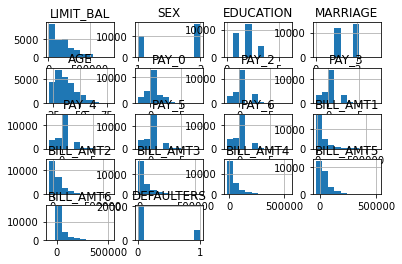

In [12]:
# the distribution of the original data
sCredit.hist()
plt.show()

# Data Transformation

In [13]:
# rescaling the data
rescale = sCredit.values
g= rescale[:, 0:-1]
h= rescale[:, -1]

scaler = MinMaxScaler(feature_range=(-1,1))
rh = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rCredit = pd.DataFrame(rh)
rCredit.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# adding back the 'target' output feature
rCredit['DEFAULTERS'] = sCredit['DEFAULTERS']
rCredit.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,25407.0,-0.582351,0.339812,-1.0,-0.893333,-0.653333,-0.386667,1.0
SEX,25407.0,0.212107,0.977266,-1.0,-1.000000,1.000000,1.000000,1.0
EDUCATION,25407.0,-0.380512,0.262211,-1.0,-0.666667,-0.333333,-0.333333,1.0
MARRIAGE,25407.0,0.031369,0.348170,-1.0,-0.333333,0.333333,0.333333,1.0
AGE,25407.0,-0.498377,0.319949,-1.0,-0.758621,-0.551724,-0.275862,1.0
PAY_0,25407.0,-0.595962,0.223597,-1.0,-0.800000,-0.600000,-0.600000,1.0
PAY_2,25407.0,-0.617350,0.239981,-1.0,-0.800000,-0.600000,-0.600000,1.0
PAY_3,25407.0,-0.624190,0.238917,-1.0,-0.800000,-0.600000,-0.600000,1.0
PAY_4,25407.0,-0.635510,0.234423,-1.0,-0.800000,-0.600000,-0.600000,1.0
PAY_5,25407.0,-0.645405,0.228169,-1.0,-0.800000,-0.600000,-0.600000,1.0


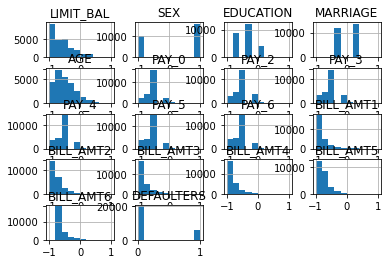

In [14]:
# the distribution of the rescaled data
rCredit.hist()
plt.show()

In [15]:
# Normalizing the data

norm = sCredit.values
i = rescale[:, 0:-1]
j = rescale[:, -1]

nScaler = Normalizer()
nc = nScaler.fit_transform(i)
set_printoptions(precision=3)

# put transorm data into dataframe and display
nCredit = pd.DataFrame(nc)
nCredit.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# adding back the 'target' output feature
nCredit['DEFAULTERS'] = sCredit['DEFAULTERS']
nCredit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULTERS
count,25407.000000,2.540700e+04,25407.000000,25407.000000,25407.000000,25407.000000,25407.000000,2.540700e+04,2.540700e+04,2.540700e+04,25407.000000,25407.000000,25407.000000,25407.000000,25407.000000,25407.000000,25407.000000,25407.000000
mean,0.738164,1.389611e-05,0.000018,0.000014,0.000309,0.000002,0.000001,8.395527e-07,1.455258e-07,-5.420689e-07,-0.000001,0.228981,0.218905,0.206594,0.189433,0.176324,0.170102,0.227890
std,0.237975,1.627070e-05,0.000024,0.000019,0.000374,0.000017,0.000019,2.164832e-05,2.405070e-05,2.378147e-05,0.000024,0.181192,0.173092,0.164883,0.154834,0.150261,0.151715,0.419479
min,0.204110,7.292067e-07,0.000000,0.000000,0.000018,-0.000200,-0.000200,-1.999994e-04,-1.999994e-04,-1.999994e-04,-0.000200,-0.129282,-0.158997,-0.097128,-0.191701,-0.273479,-0.370905,0.000000
25%,0.490936,4.877394e-06,0.000005,0.000004,0.000112,-0.000002,-0.000004,-3.837891e-06,-3.995243e-06,-4.159227e-06,-0.000005,0.025233,0.021532,0.019391,0.016992,0.012521,0.008897,0.000000
50%,0.763972,8.692120e-06,0.000009,0.000008,0.000184,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.263313,0.254572,0.232381,0.198954,0.173339,0.157371,0.000000
75%,0.993480,1.666095e-05,0.000020,0.000016,0.000349,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.380126,0.371913,0.363285,0.343222,0.322572,0.317379,0.000000
max,1.000000,1.999994e-04,0.000380,0.000272,0.005674,0.000291,0.000363,6.091778e-04,6.098702e-04,6.098702e-04,0.000610,0.819994,0.763260,0.687771,0.699029,0.735597,0.720300,1.000000


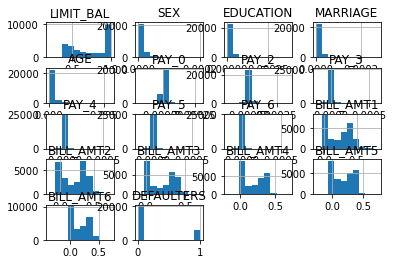

In [31]:
# the distribution of the normalized data
nCredit.hist()
plt.show()

In [29]:
# testing for accuracy of the selected features with GradientBoostingClassifier

tCredit = nCredit.values
x = tCredit[:, 0:-1]
y = tCredit[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = GradientBoostingClassifier()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('The accuracy of the selected features for modeling is: %.2f' % (accuracy*100))

The accuracy of the selected features for modeling is: 81.85
